# Movie Recommendation System - Exploratory Data Analysis (EDA)

## Objectives
1. **Initial Data Inspection**: Review data types, dimensions, and summary statistics
2. **Univariate Analysis**: Analyze distribution of individual features
3. **Bivariate Analysis**: Explore relationships between pairs of features
4. **Missing Value Analysis**: Quantify and visualize missing data patterns
5. **Content Analysis**: Examine movie metadata for recommendation system
6. **Hypothesis Generation**: Formulate hypotheses for recommendation logic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ast
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Data Loading and Initial Inspection

In [3]:
movies_df = pd.read_csv('../data/raw/tmdb_5000_movies.csv')
credits_df = pd.read_csv('../data/raw/tmdb_5000_credits.csv')

print("Movies Dataset Shape:", movies_df.shape)
print("Credits Dataset Shape:", credits_df.shape)
print("\nMovies Dataset Columns:", list(movies_df.columns))
print("\nCredits Dataset Columns:", list(credits_df.columns))
print("\nMovies Dataset Info:")
print(movies_df.info())
print("\nCredits Dataset Info:")
print(credits_df.info())

Movies Dataset Shape: (4803, 20)
Credits Dataset Shape: (4803, 4)

Movies Dataset Columns: ['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']

Credits Dataset Columns: ['movie_id', 'title', 'cast', 'crew']

Movies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title       

In [4]:
print("Movies Dataset - First 5 rows:")
display(movies_df.head())

print("\nCredits Dataset - First 5 rows:")
display(credits_df.head())

Movies Dataset - First 5 rows:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124



Credits Dataset - First 5 rows:


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,c285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
# Convert columns to same data type (string is usually safer)
movies_df['id'] = movies_df['id'].astype(str)
credits_df['movie_id'] = credits_df['movie_id'].astype(str)

# merge
df = movies_df.merge(credits_df, left_on='id', right_on='movie_id', how='inner')
print(f"Merged Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Check for duplicate title columns and handle them
if 'title_x' in df.columns and 'title_y' in df.columns:
    df['title'] = df['title_x']
    df = df.drop(['title_x', 'title_y'], axis=1)
    print("Handled duplicate title columns")

Merged Dataset Shape: (4802, 24)
Columns: ['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average', 'vote_count', 'movie_id', 'title_y', 'cast', 'crew']
Handled duplicate title columns


## 2. Missing Value Analysis

In [6]:
# Calculate missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Percentage', ascending=False)

print("Missing Values Analysis:")
display(missing_df[missing_df['Missing Count'] > 0])

Missing Values Analysis:


,Missing Count,Missing Percentage
homepage,3091,64.369013
tagline,844,17.576010
overview,3,0.062474
runtime,2,0.041649
release_date,1,0.020825


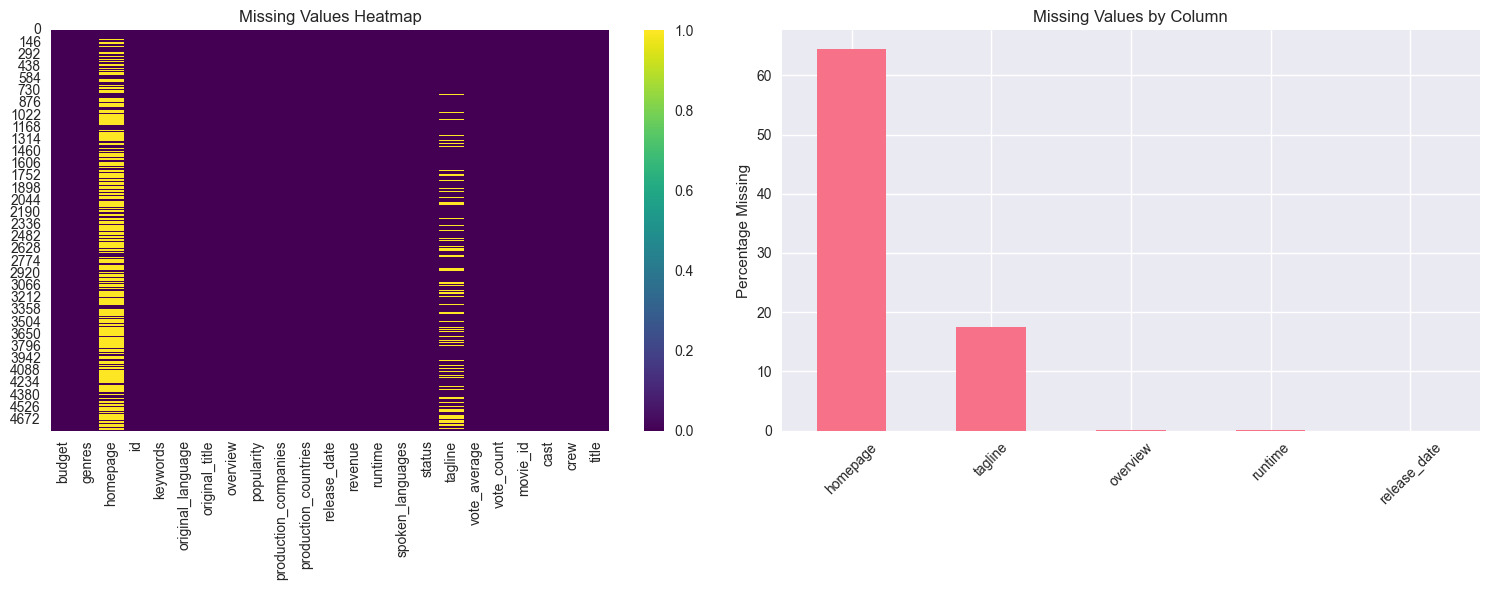

In [7]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Missing values heatmap
sns.heatmap(df.isnull(), cbar=True, ax=axes[0], cmap='viridis')
axes[0].set_title('Missing Values Heatmap')

# Missing values bar plot
missing_cols = missing_df[missing_df['Missing Count'] > 0]
if not missing_cols.empty:
    missing_cols['Missing Percentage'].plot(kind='bar', ax=axes[1])
    axes[1].set_title('Missing Values by Column')
    axes[1].set_ylabel('Percentage Missing')
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_year'].min(), df['release_year'].max()



(np.float64(1916.0), np.float64(2017.0))

## 3. Univariate Analysis

In [ ]:
print("Statistical Summary:")
display(df.describe())

Statistical Summary:


,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.802000e+03,4802.000000,4.802000e+03,4800.000000,4802.000000,4802.000000
mean,2.898861e+07,21.467813,8.207764e+07,106.862917,6.092003,689.424615
std,4.053842e+07,31.774665,1.623795e+08,22.596499,1.194680,1233.489342
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.850000e+05,4.667650,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.913104,1.916124e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.264356,9.290086e+07,117.250000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


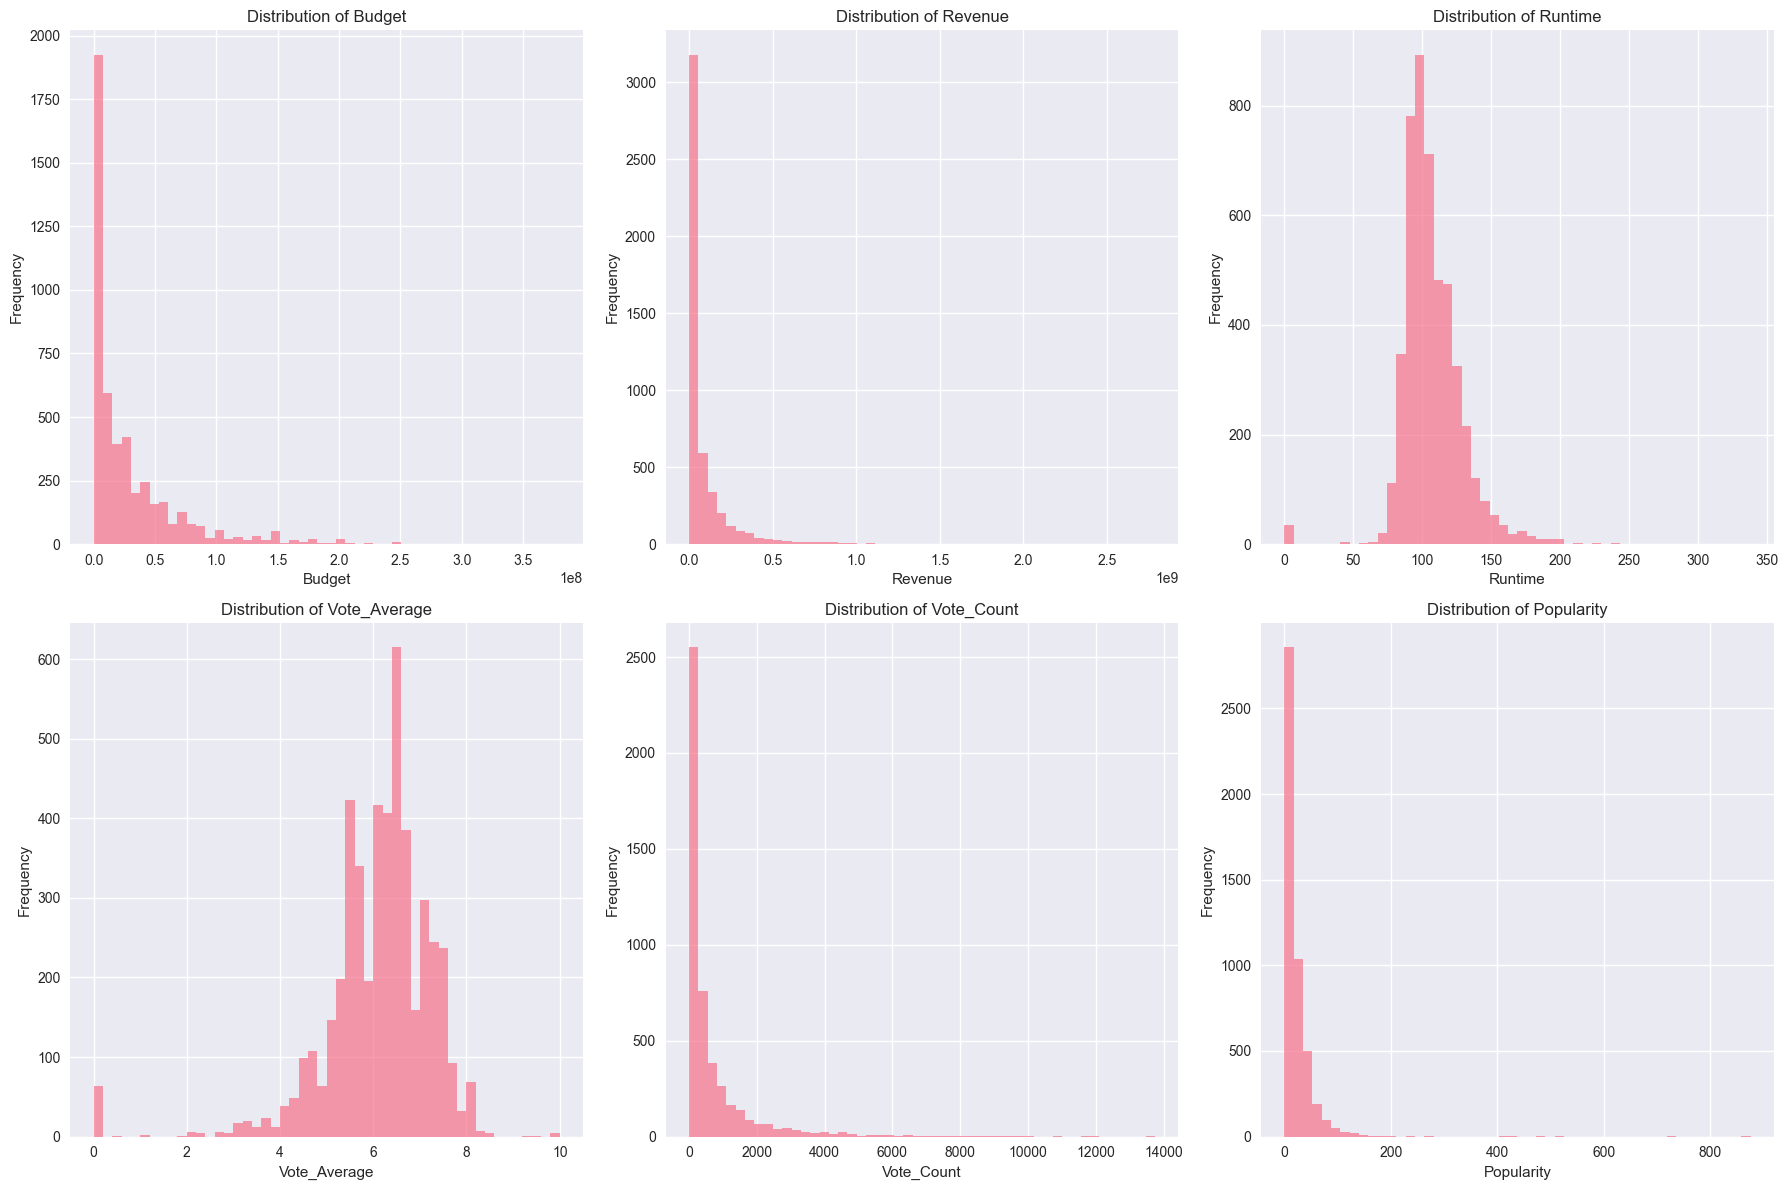

In [9]:
# Distribution of key numerical features
numerical_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity']
# Filter to only existing columns
numerical_cols = [col for col in numerical_cols if col in df.columns]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df[col].hist(bins=50, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribution of {col.title()}')
        axes[i].set_xlabel(col.title())
        axes[i].set_ylabel('Frequency')

# Hide unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

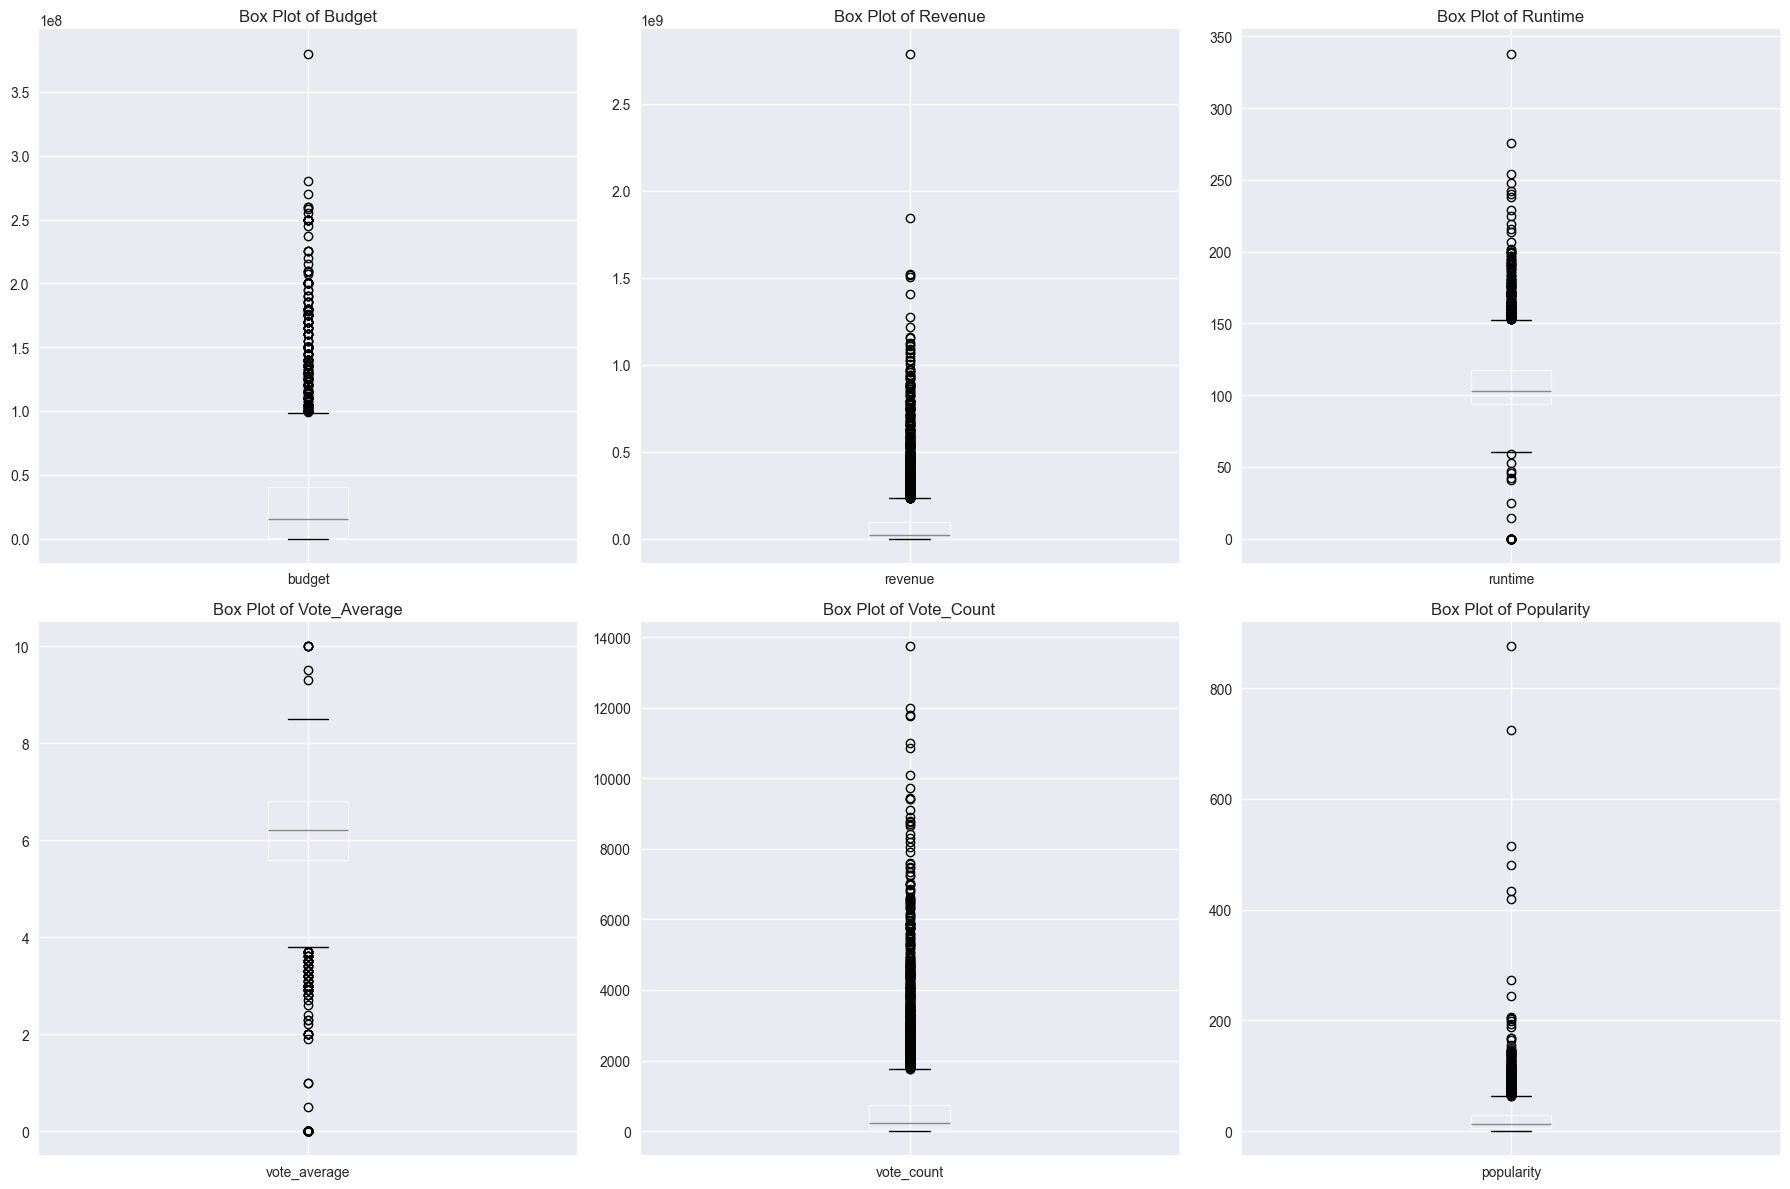

In [10]:
# Box plots for outlier detection
numerical_cols = [col for col in ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity'] if col in df.columns]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col.title()}')

# Hide unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## 4. Content Analysis for Recommendation System

In [11]:
# Function to extract information from JSON-like strings
def extract_names(obj_list, key='name', limit=None):
    """Extract names from JSON-like string"""
    try:
        obj_list = ast.literal_eval(obj_list)
        names = [obj[key] for obj in obj_list if key in obj]
        return names[:limit] if limit else names
    except:
        return []

# Extract genres
df['genres_list'] = df['genres'].apply(lambda x: extract_names(x, 'name'))
df['num_genres'] = df['genres_list'].apply(len)

# Extract cast
df['cast_list'] = df['cast'].apply(lambda x: extract_names(x, 'name', limit=5))
df['num_cast'] = df['cast_list'].apply(len)

# Extract director from crew
def extract_director(crew_list):
    try:
        crew = ast.literal_eval(crew_list)
        for person in crew:
            if person.get('job') == 'Director':
                return person.get('name', '')
        return ''
    except:
        return ''

df['director'] = df['crew'].apply(extract_director)

print("Content features extracted successfully!")
print(f"Movies with genres: {df['num_genres'].gt(0).sum()}")
print(f"Movies with cast info: {df['num_cast'].gt(0).sum()}")
print(f"Movies with director info: {df['director'].ne('').sum()}")

Content features extracted successfully!
Movies with genres: 4774
Movies with cast info: 4759
Movies with director info: 4772


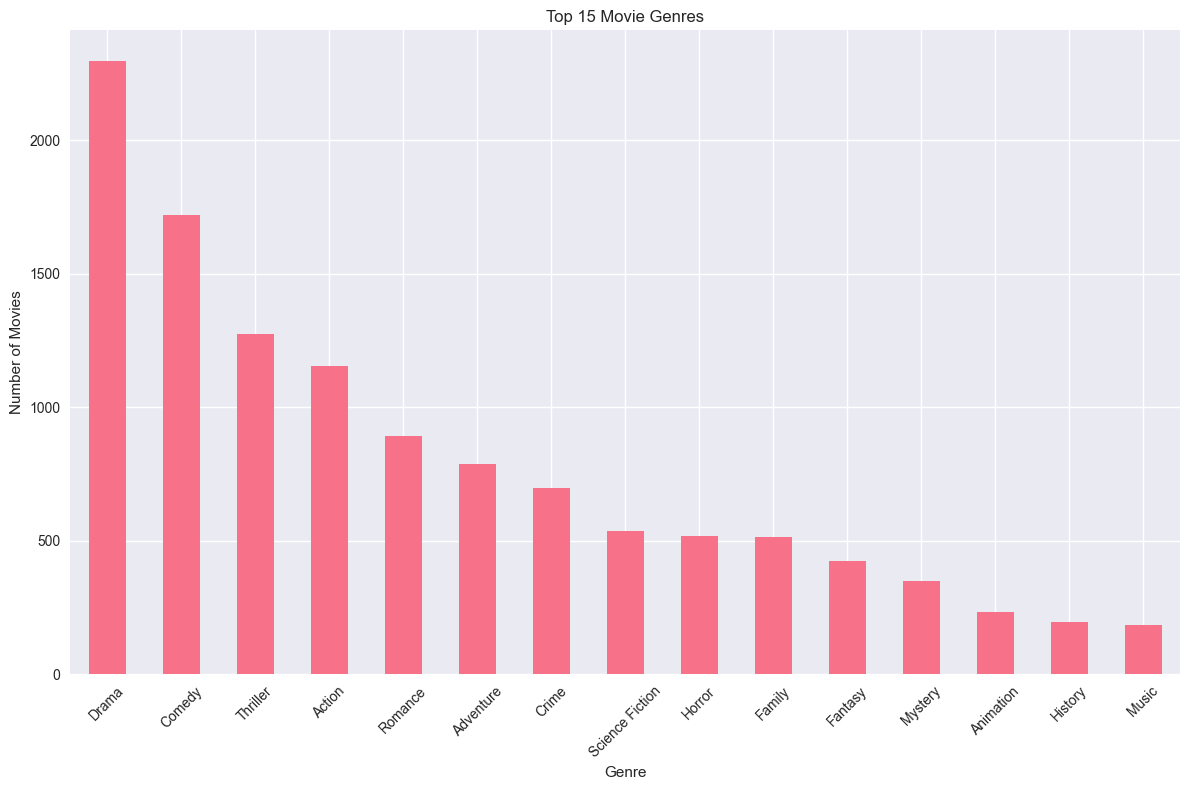

Total unique genres: 20
Top 10 genres:
Drama              2297
Comedy             1722
Thriller           1274
Action             1153
Romance             894
Adventure           789
Crime               696
Science Fiction     535
Horror              519
Family              513
Name: count, dtype: int64


In [12]:
# Genre analysis
all_genres = []
for genres in df['genres_list']:
    all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts()

# Plot top genres
plt.figure(figsize=(12, 8))
genre_counts.head(15).plot(kind='bar')
plt.title('Top 15 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total unique genres: {len(genre_counts)}")
print(f"Top 10 genres:\n{genre_counts.head(10)}")

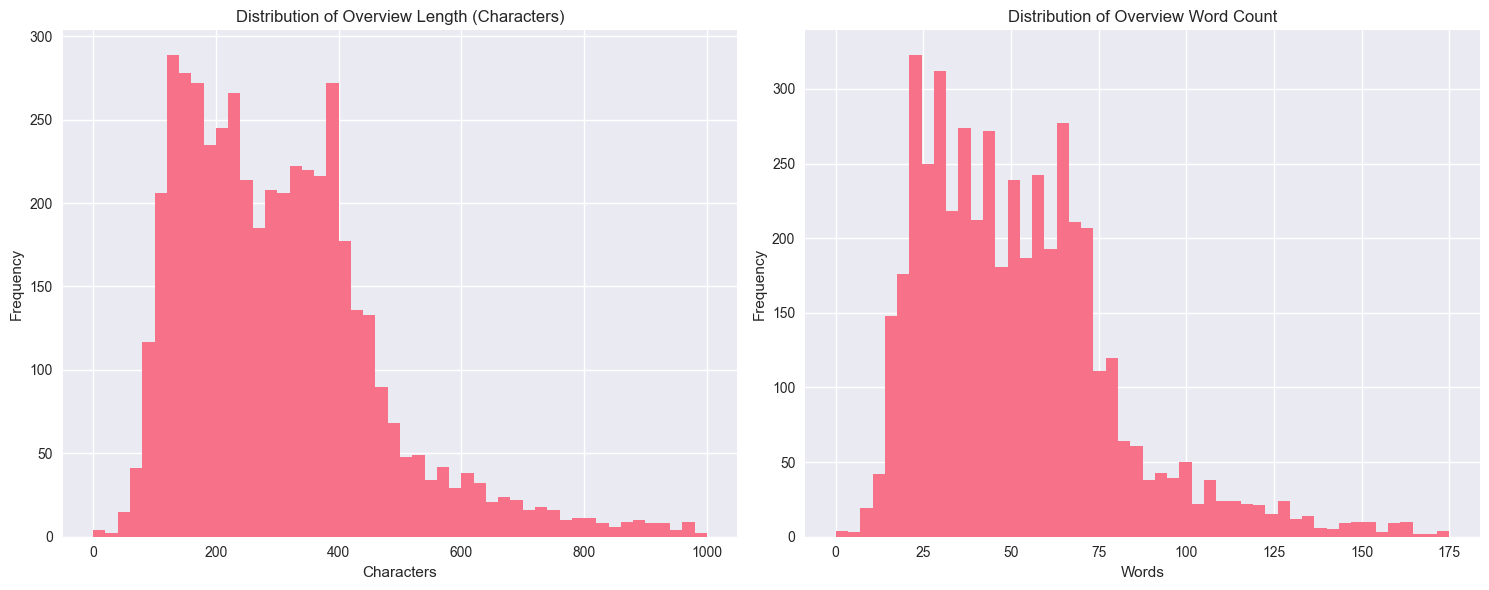

Average overview length: 305.2 characters
Average word count: 52.1 words


In [13]:
# Overview length analysis
df['overview_length'] = df['overview'].fillna('').str.len()
df['overview_word_count'] = df['overview'].fillna('').str.split().str.len()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Overview length distribution
df['overview_length'].hist(bins=50, ax=axes[0])
axes[0].set_title('Distribution of Overview Length (Characters)')
axes[0].set_xlabel('Characters')
axes[0].set_ylabel('Frequency')

# Overview word count distribution
df['overview_word_count'].hist(bins=50, ax=axes[1])
axes[1].set_title('Distribution of Overview Word Count')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Average overview length: {df['overview_length'].mean():.1f} characters")
print(f"Average word count: {df['overview_word_count'].mean():.1f} words")

## 5. Bivariate Analysis

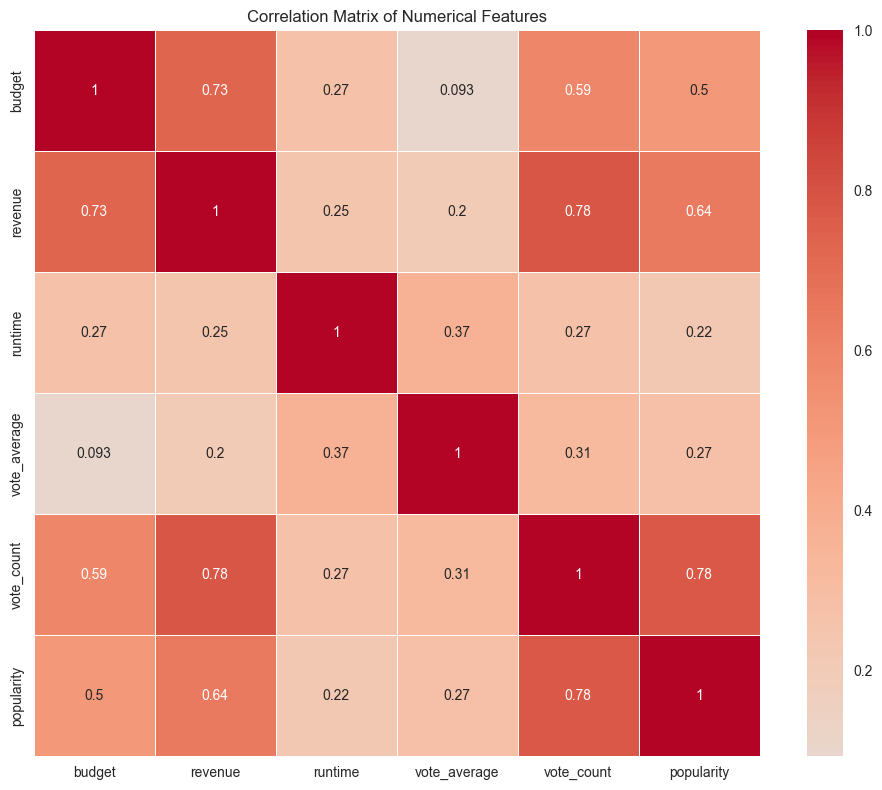

In [14]:
# Correlation matrix
corr_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity']
correlation_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

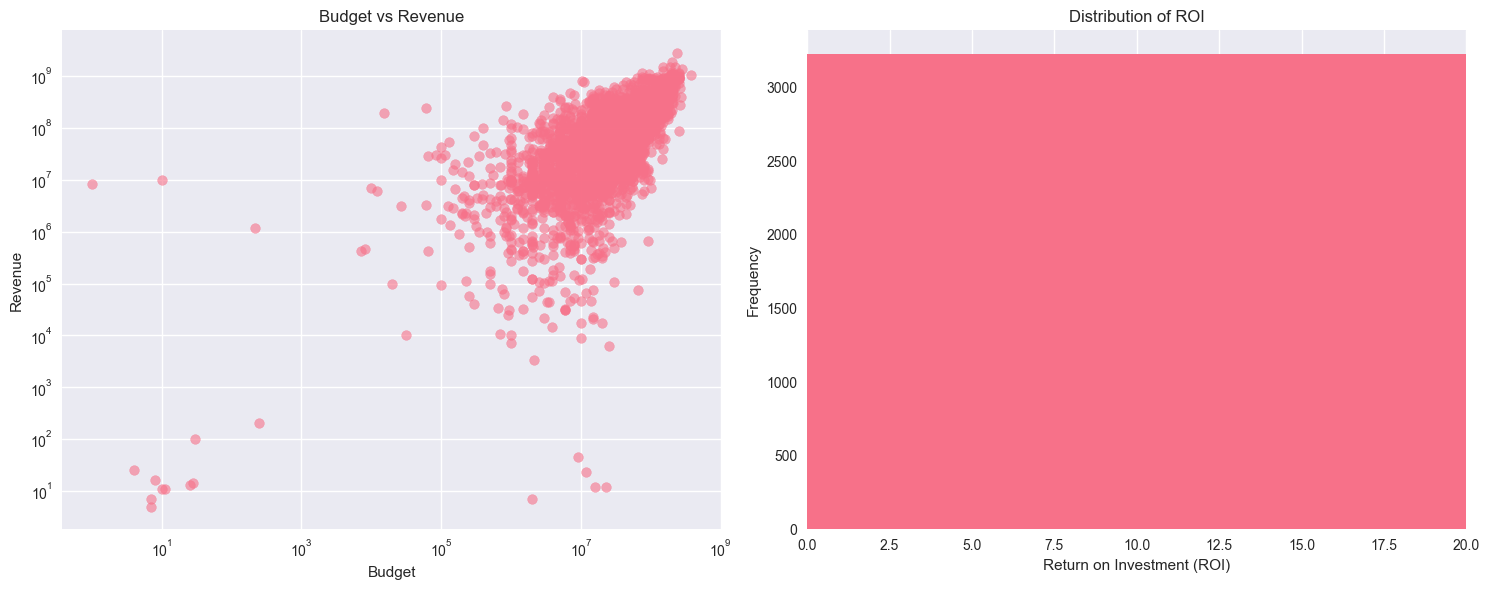

Average ROI: 2955.74
Median ROI: 2.30


In [15]:
# Budget vs Revenue analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
df_filtered = df[(df['budget'] > 0) & (df['revenue'] > 0)]
axes[0].scatter(df_filtered['budget'], df_filtered['revenue'], alpha=0.6)
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Revenue')
axes[0].set_title('Budget vs Revenue')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

# ROI analysis
df_filtered['roi'] = df_filtered['revenue'] / df_filtered['budget']
df_filtered['roi'].hist(bins=50, ax=axes[1])
axes[1].set_xlabel('Return on Investment (ROI)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of ROI')
axes[1].set_xlim(0, 20)  # Limit to reasonable ROI values

plt.tight_layout()
plt.show()

print(f"Average ROI: {df_filtered['roi'].mean():.2f}")
print(f"Median ROI: {df_filtered['roi'].median():.2f}")

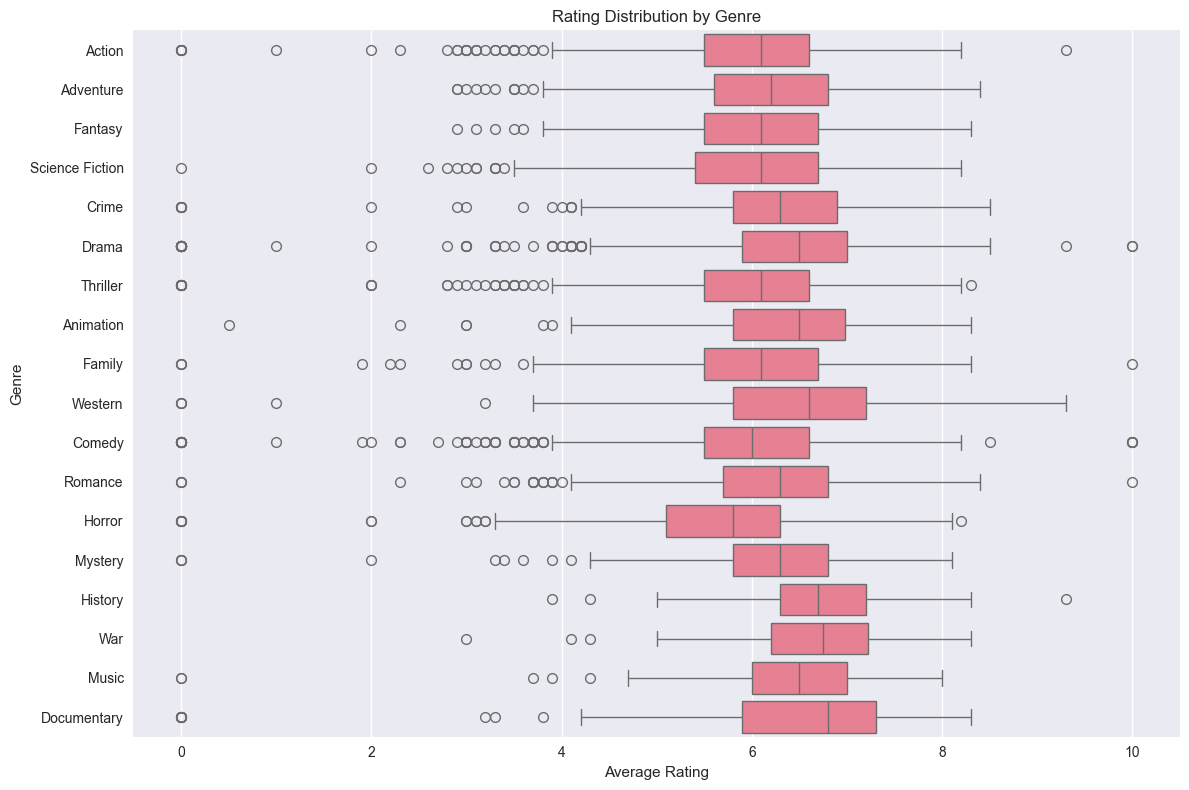

In [16]:
# Rating analysis by genre
genre_ratings = []
for idx, row in df.iterrows():
    for genre in row['genres_list']:
        genre_ratings.append({
            'genre': genre,
            'rating': row['vote_average'],
            'vote_count': row['vote_count']
        })

genre_ratings_df = pd.DataFrame(genre_ratings)

# Filter genres with sufficient movies
genre_counts_filter = genre_ratings_df['genre'].value_counts()
popular_genres = genre_counts_filter[genre_counts_filter >= 50].index
genre_ratings_filtered = genre_ratings_df[genre_ratings_df['genre'].isin(popular_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=genre_ratings_filtered, x='rating', y='genre')
plt.title('Rating Distribution by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## 6. Temporal Analysis

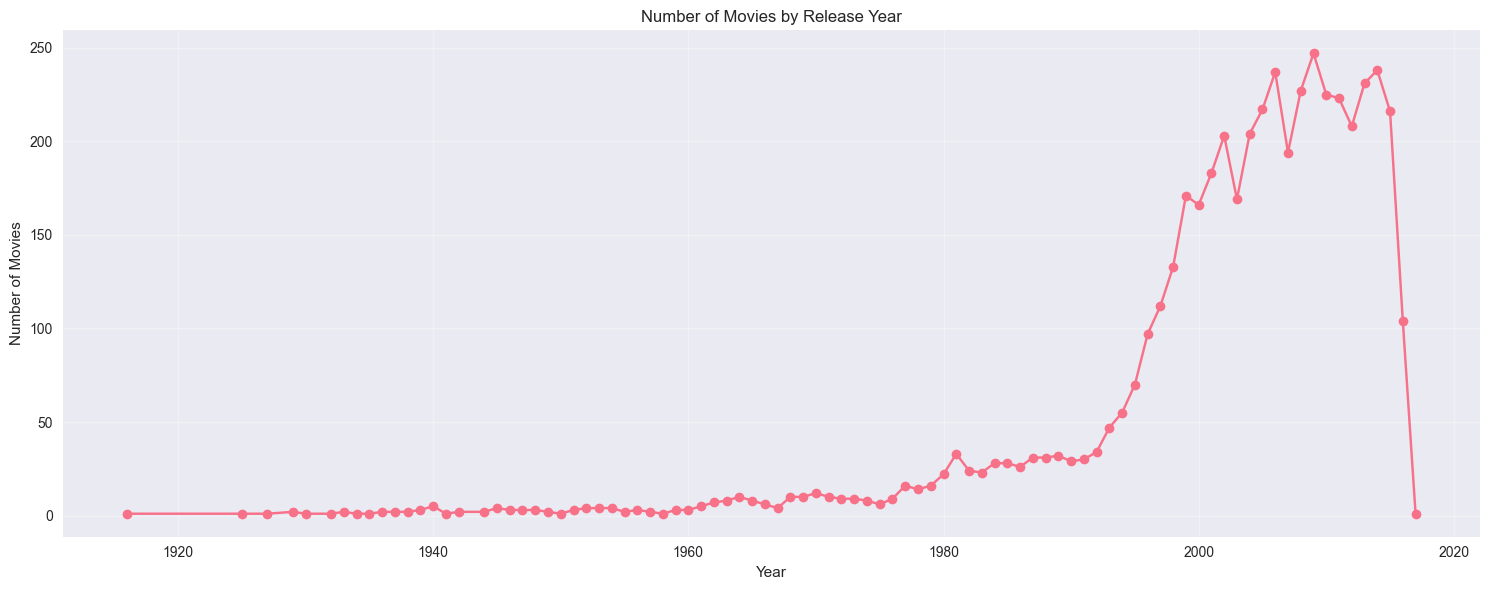

Year range: 1916.0 - 2017.0
Peak year: 2009.0 with 247 movies


In [17]:
# Release date analysis
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

# Movies by year
yearly_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Number of Movies by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Year range: {df['release_year'].min()} - {df['release_year'].max()}")
print(f"Peak year: {yearly_counts.idxmax()} with {yearly_counts.max()} movies")

## 7. Content Quality Assessment for Recommendation System

In [18]:
# Assess data completeness for recommendation features
recommendation_features = {
    'overview': df['overview'].notna() & (df['overview'] != ''),
    'genres': df['num_genres'] > 0,
    'cast': df['num_cast'] > 0,
    'director': df['director'] != ''
}

feature_completeness = pd.DataFrame({
    'Feature': list(recommendation_features.keys()),
    'Complete_Count': [mask.sum() for mask in recommendation_features.values()],
    'Complete_Percentage': [mask.mean() * 100 for mask in recommendation_features.values()]
})

print("Feature Completeness for Recommendation System:")
display(feature_completeness)

# Movies with all features available
all_features_available = (
    recommendation_features['overview'] & 
    recommendation_features['genres'] & 
    recommendation_features['cast'] & 
    recommendation_features['director']
)

print(f"\nMovies with all recommendation features: {all_features_available.sum()} ({all_features_available.mean()*100:.1f}%)")

Feature Completeness for Recommendation System:


,Feature,Complete_Count,Complete_Percentage
0,overview,4799,99.937526
1,genres,4774,99.416910
2,cast,4759,99.104540
3,director,4772,99.375260



Movies with all recommendation features: 4737 (98.6%)


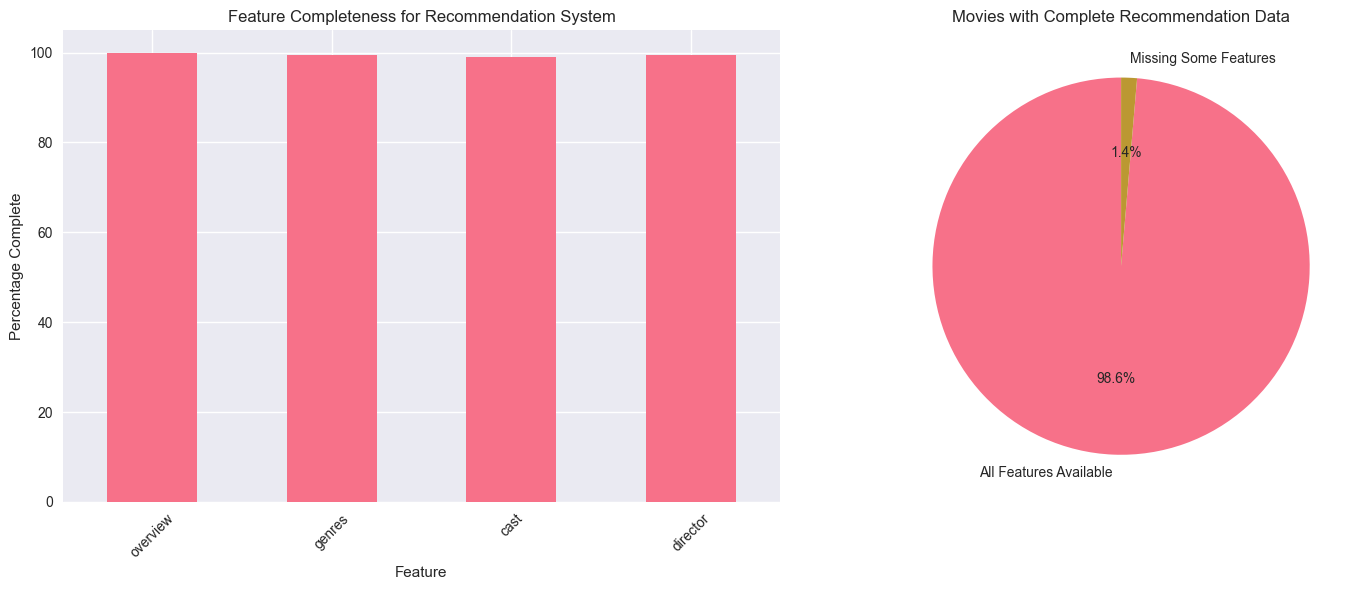

In [19]:
# Visualize feature completeness
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of feature completeness
feature_completeness.set_index('Feature')['Complete_Percentage'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Feature Completeness for Recommendation System')
axes[0].set_ylabel('Percentage Complete')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart of movies with all features
complete_data = [all_features_available.sum(), len(df) - all_features_available.sum()]
labels = ['All Features Available', 'Missing Some Features']
axes[1].pie(complete_data, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Movies with Complete Recommendation Data')

plt.tight_layout()
plt.show()

## 8. Key Findings and Hypotheses

### Data Quality Insights:
1. **Dataset Size**: The merged dataset contains information about movies with both metadata and cast/crew information
2. **Missing Values**: Most critical features for recommendation (overview, genres, cast) have good completeness
3. **Content Richness**: Movies have diverse genres, cast, and plot descriptions suitable for content-based filtering

### Recommendation System Hypotheses:
1. **Genre Similarity**: Movies sharing genres will have higher content similarity
2. **Cast Overlap**: Movies with common actors/directors will be recommended together
3. **Plot Similarity**: Movies with similar plot keywords and themes will cluster together
4. **Multi-feature Approach**: Combining plot, genres, cast, and director will provide better recommendations than single features


In [ ]:
import os
os.makedirs('../data/processed', exist_ok=True)
# Move 'original_title' to the first column
if 'original_title' in df.columns:
    # Method 1: Simple reordering
    df = df[['original_title'] + [col for col in df.columns if col != 'original_title']]
    print("Moved 'original_title' to the first column")
    print(f"First 5 columns: {list(df.columns)[:5]}")
else:
    print("'original_title' column not found. Available columns:")
    print(list(df.columns))
# Save the merged and feature-enriched dataset
df.to_csv('../data/processed/movies_with_features.csv', index=False)
print("Processed data saved to '../data/processed/movies_with_features.csv'")

# Save summary statistics
summary_stats = {
    'total_movies': len(df),
    'movies_with_all_features': all_features_available.sum(),
    'unique_genres': len(genre_counts),
    'avg_overview_length': df['overview_length'].mean(),
    'year_range': f"{df['release_year'].min()}-{df['release_year'].max()}"
}

print("\nDataset Summary:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")

Moved 'original_title' to the first column
First 5 columns: ['original_title', 'budget', 'genres', 'homepage', 'id']


NameError: name 'df' is not defined